# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, the Kaggle no-show appointments dataset, which contains information from 110527 medical visits in Brazil, is examined. It was intended to draw a comparison between the no-show cases and those that showed up for their appointments. The data includes a variety of patient characteristics, such as patients' basic demographic information and other relevant pieces of information needed for analysis.



### Question(s) for Analysis
><ul>
    <li>What is the total appointment show-up rate in comparison to the no-show rate?</li>
    <li>What is the percentage of male to female?</li>
    <li>Do more people respond to SMS notifications?</li>
    <li>Which day of the week has the most no shows?</li>
</ul>

>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1

Requirement already up-to-date: pandas==1.1 in /opt/conda/lib/python3.6/site-packages (1.1.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## Data Cleaning
> <ul>
    <li>The ScheduledDay and ScheduledDay columns to be coverted to datetime from object using pandas astype function</li>
    <li>The Hipertension and Handcap columns to be rename appropriately for easier understanding using pandas rename function</li>
    <li> Dropping the PatientId and AppointmentID columns because they are not really needed based on the aformentioned research questions</li></ul>
 

In [4]:
# To convert ScheduledDay and AppointmentDay to the right data type (datetime)
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')

In [5]:
# To correct the name of these columns (Hipertension and Handcap)
df.rename({'Hipertension':'Hypertension','Handcap':'Handicap'}, axis=1, inplace=True)

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

### Age Column Data
> Looking at min () and max () data from the described function above, the min value is -1, which is questionable because it's unlikely that any baby will have a -1 age. What we can have is a 0 age. Also, the max value is 115. However, further investigation revealed that there are five individuals that are 115 years of age. As a result, the 115-age will be allowed for the project analysis while the -1 age will be replaced using the replace function to turn it to 0

In [7]:
df['Age'].replace({-1: 0}, inplace=True)

### New column (day_of_week) needed for analysis

>A new column is needed that shows the exact date of the week of the appointment. This is needed to show which day of the week has the largest No-show

In [8]:
df['Day_of_week'] = df['AppointmentDay'].dt.day_name()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


In [9]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.groupby('Age').count()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Day_of_week
Age,,,,,,,,,,,,
0,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540
1,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
2,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
3,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
4,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
5,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
6,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
7,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427
8,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
Day_of_week       110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 11.0+ MB


In [12]:
df.duplicated().sum()

635

In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Day_of_week
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday



### Research Question 1 (What is the total appointment show-up rate in comparison to the no-show rate?)

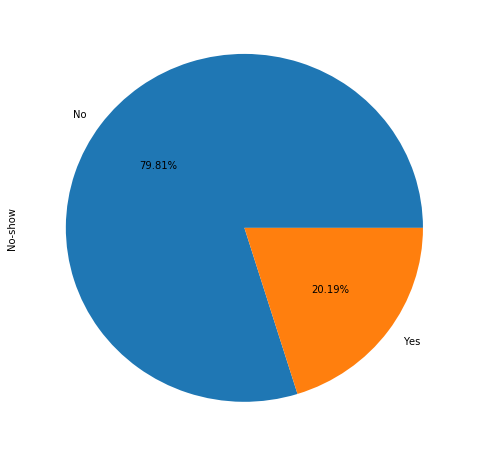

In [93]:
# Below chat shows the ratio of No-show and show from the data
df['No-show'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%.2f%%')
plt.show()

## Data explanation
>The pie chart shows the percentage of no-shows versus those that showed up for their appointment. From our visual, only 20.19% of appointees did not showed up for their appointment.

### Research Question 2  (What is the percentage of male to female?)

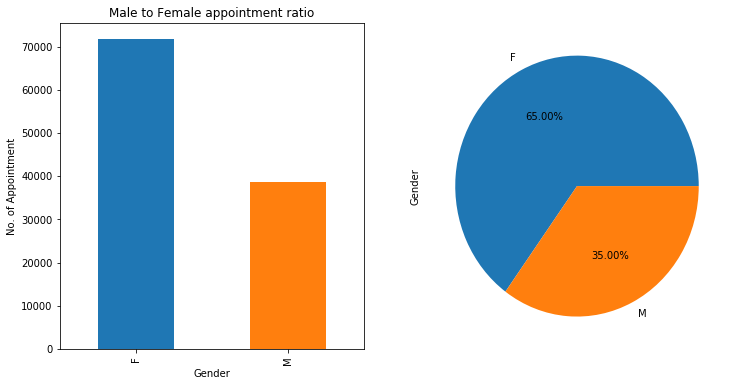

In [94]:
# Two chat will be created to clarify the male/female pecentage
# The value_count function was used along with the barchat to shows the number of female and male ratio
# The value_count function was used along with the pie chat display the ratio in percentage

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Male to Female appointment ratio')
plt.xlabel('Gender')
plt.ylabel('No. of Appointment')

plt.subplot(1,2,2)
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

### Data explanation
>There are more females compared to male. The Female has 65% while the male has 35%

### Research Question 3 (Do more people respond to SMS notifications?) 

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

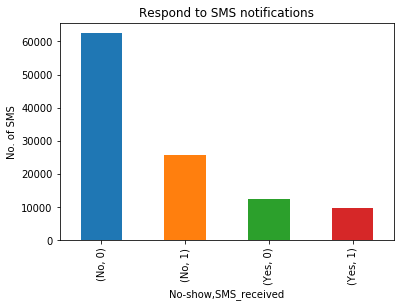

In [25]:
# Using a bar chat to groupby function and value_count to aggregate the data 
df.groupby('No-show')['SMS_received'].value_counts().plot.bar()
df.groupby('No-show')['SMS_received'].value_counts()
plt.title('Respond to SMS notifications')
plt.ylabel('No. of SMS')
df.groupby('No-show')['SMS_received'].value_counts()

In [39]:
sms =df[df['SMS_received']==1]
len(sms)

35482

### Data explanation

> The number of those that received SMS and did not show-up is higher than those that showed up. This is a constract to the general appointment of those that showed compared to those that did not show-up. This implies that SMS did not improve the rate of appointee that showed up on their appointment day 

### Research Question 4 (Which day of the week has the most no shows?)

Day_of_week  No-show
Friday       No         14982
             Yes         4037
Monday       No         18025
             Yes         4690
Saturday     No            30
             Yes            9
Thursday     No         13909
             Yes         3338
Tuesday      No         20488
             Yes         5152
Wednesday    No         20774
             Yes         5093
Name: No-show, dtype: int64

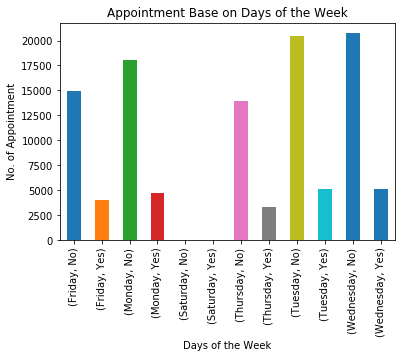

In [81]:
df.groupby('Day_of_week')['No-show'].value_counts().plot.bar()
plt.title('Appointment Base on Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('No. of Appointment')
df.groupby('Day_of_week')['No-show'].value_counts()

### Data explanation

>Wednesday has the highest number of appointee that showed up, followed by Tuesday. While Thursday has the least number of appointee and showed up. There was no appointment for sunday.

<a id='conclusions'></a>
## Conclusions

> The dataset for this research includes 110,527 appointments, with around 20.19 percent of patients failing to show up for their visits. 
Females made up 65 percent of the patients, while men made up 35 percent.
It was clear that the SMS delivered to patients had no effect on the patient's attendance at their appointment. 
Wednesday has the greatest appointment and show-up rate of any day.


### Limitations
> I was unable to find out why more people shows up on Wednesday compared to other days because there were no data relating to the medical personnel on duties, or the nature of the job done by the patients. 




### References:
<ul>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/index.html"target="blank">Pandas Documentation</a></li></ul>

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0